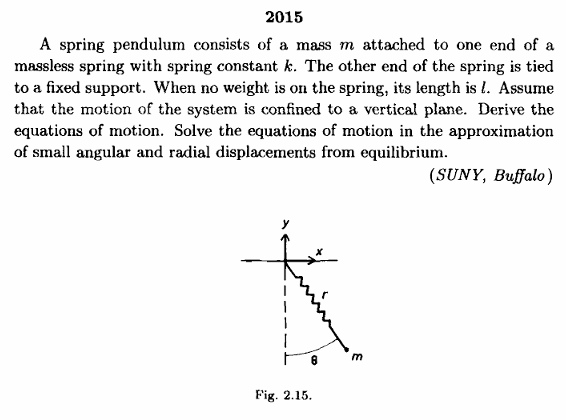

In [9]:
from sympy import symbols, cos, diff, Eq
from sympy.physics.mechanics import dynamicsymbols
import numpy as np

# Define the variables
m, r, theta, k, g, l = symbols("m r theta k g l")
t = symbols("t")

# Define r and theta as functions of time
r, theta = dynamicsymbols("r theta")

# Kinetic energy (T) and potential energy (V) equations
T = 0.5 * m * (r.diff(t) ** 2 + (r * theta.diff(t)) ** 2)
V = 0.5 * k * (r - l) ** 2 - m * g * r * cos(theta)

print("T = ", T)
print("V = ", V)

# Lagrangian equation
L = T - V
print("L = ", L)

# Find the equations of motion
eq_r = diff(L.diff(r.diff(t)), t) - L.diff(r)
eq_theta = diff(L.diff(theta.diff(t)), t) - L.diff(theta)

print("Equation 1 1: ", eq_r)
print("Equation 1 2: ", eq_theta)

r_dot = r.diff(t)
theta_dot = theta.diff(t)
r_dot_dot = diff(L.diff(r_dot), t) - L.diff(r)
theta_dot_dot = diff(L.diff(theta_dot), t) - L.diff(theta)

# Define the initial conditions
r_val = 1
theta_val = 1
r_dot_val = 1
theta_dot_val = 1

# Define the time step and the number of steps
dt = 0.01
n_steps = 10

# Initialize lists to store the values of r, theta, r_dot and theta_dot
r_values = [r_val]
theta_values = [theta_val]
r_dot_values = [r_dot_val]
theta_dot_values = [theta_dot_val]

# Perform the Euler method
for _ in range(n_steps):
    r_val += dt * r_dot_val
    theta_val += dt * theta_dot_val
    r_dot_val += dt * r_dot_dot.subs([(r, r_val), (theta, theta_val), (r_dot, r_dot_val), (theta_dot, theta_dot_val)])
    theta_dot_val += dt * theta_dot_dot.subs([(r, r_val), (theta, theta_val), (r_dot, r_dot_val), (theta_dot, theta_dot_val)])
    
    r_values.append(r_val)
    theta_values.append(theta_val)
    r_dot_values.append(r_dot_val)
    theta_dot_values.append(theta_dot_val)

T =  0.5*m*(r(t)**2*Derivative(theta(t), t)**2 + Derivative(r(t), t)**2)
V =  -g*m*r(t)*cos(theta(t)) + 0.5*k*(-l + r(t))**2
L =  g*m*r(t)*cos(theta(t)) - 0.5*k*(-l + r(t))**2 + 0.5*m*(r(t)**2*Derivative(theta(t), t)**2 + Derivative(r(t), t)**2)
Equation 1 1:  -g*m*cos(theta(t)) + 0.5*k*(-2*l + 2*r(t)) - 1.0*m*r(t)*Derivative(theta(t), t)**2 + 1.0*m*Derivative(r(t), (t, 2))
Equation 1 2:  g*m*r(t)*sin(theta(t)) + 1.0*m*r(t)**2*Derivative(theta(t), (t, 2)) + 2.0*m*r(t)*Derivative(r(t), t)*Derivative(theta(t), t)


KeyboardInterrupt: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial conditions
r0 = 1.0
theta0 = 0.0
rdot0 = 0.0
thetadot0 = 1.0

# Define the time step and total time
dt = 0.01
T = 10.0

# Initialize arrays to store the values of r, theta, rdot, and thetadot
t = np.arange(0, T, dt)
r = np.zeros_like(t)
theta = np.zeros_like(t)
rdot = np.zeros_like(t)
thetadot = np.zeros_like(t)

# Initialize lists to store the values of r, theta, rdot, and thetadot
r = [0] * len(t)
theta = [0] * len(t)
rdot = [0] * len(t)
thetadot = [0] * len(t)

# Set the initial conditions
r[0] = r0
theta[0] = theta0
rdot[0] = rdot0
thetadot[0] = thetadot0

# Use a loop to iterate over each time step
for i in range(1, len(t)):
    # Use the Euler method to update the values of r, theta, rdot, and thetadot
    r[i] = r[i - 1] + dt * rdot[i - 1]
    theta[i] = theta[i - 1] + dt * thetadot[i - 1]
    rdot[i] = rdot[i - 1] + dt * eq_r.subs(
        {
            r: r[i - 1],
            theta: theta[i - 1],
            r.diff(t): rdot[i - 1],
            theta.diff(t): thetadot[i - 1],
        }
    )
    thetadot[i] = thetadot[i - 1] + dt * eq_theta.subs(
        {
            r: r[i - 1],
            theta: theta[i - 1],
            r.diff(t): rdot[i - 1],
            theta.diff(t): thetadot[i - 1],
        }
    )

# After the loop, plot r and theta as functions of time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, r)
plt.xlabel("Time")
plt.ylabel("r")

plt.subplot(2, 1, 2)
plt.plot(t, theta)
plt.xlabel("Time")
plt.ylabel("theta")

plt.tight_layout()
plt.show()

AttributeError: 'list' object has no attribute 'diff'

The equation you're seeing is the result of applying the Euler-Lagrange equation to the Lagrangian `L` for the variable `theta`. The Euler-Lagrange equation is a formula used to find the equations of motion that follow from a given Lagrangian.

The Euler-Lagrange equation is given by:

`d/dt(∂L/∂(dθ/dt)) - ∂L/∂θ = 0`

In your code, `L.diff(theta.diff(t))` computes `∂L/∂(dθ/dt)`, `diff(L.diff(theta.diff(t)), t)` computes `d/dt(∂L/∂(dθ/dt))`, and `L.diff(theta)` computes `∂L/∂θ`. The difference between these two terms gives the equation of motion for `theta`.

The equation you're expecting seems to be a simplification of the actual equation of motion. The actual equation of motion includes terms for the derivatives of `r` and `theta` with respect to time, as well as a term for the gravitational force. These terms are necessary to accurately describe the motion of the system.

The equation you're seeing is the most general form of the equation of motion for `theta`. It's possible that under certain assumptions or approximations, this equation could simplify to the form you're expecting. However, without knowing what those assumptions or approximations are, it's difficult to say why the equation isn't in that form.